In [27]:
import numpy as np
import matplotlib.pyplot as plt

We can approximate r err as 0.0005.

In [28]:
def inherent_floating_point_error(array,dtype1=np.float64,dtype2=np.float16):
    try:
        return array.astype(dtype1) - array.astype(dtype2)
    except:
        return dtype1(array) - dtype2(array)

def sqrt_diff(a,dtype1=np.float64,dtype2=np.float16):
    return (np.sqrt(dtype1(a),dtype=dtype1) - np.sqrt(dtype2(a),dtype=dtype2))/np.sqrt(dtype1(a),dtype=dtype1)

def sqr_diff(a,dtype1=np.float64,dtype2=np.float16):
    return (np.square(dtype1(a),dtype=dtype1) - np.square(dtype2(a),dtype=dtype2))/np.square(dtype1(a),dtype=dtype1)

float16_range = (0.00006103515625,65504)
float16_exprange = np.log2(np.array(float16_range))

samples = 2**np.linspace(*float16_exprange,1000000)
samples_f2err = inherent_floating_point_error(samples)

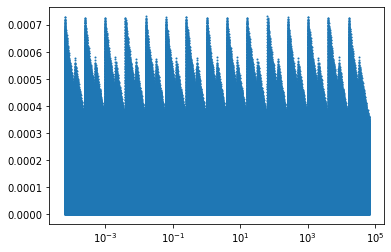

In [29]:
samples = 2**np.linspace(*float16_exprange,1000000)
ys = np.abs(sqrt_diff(samples))
np.max(ys)
plt.scatter(samples,ys,s=1)
plt.xscale('log')
plt.show()

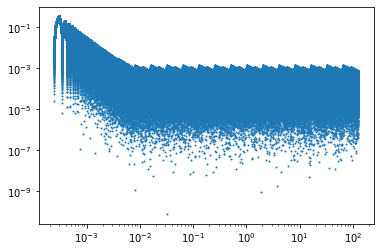

In [130]:
samples = 2**np.linspace(-12,7,1000000)
ys = np.abs(sqr_diff(samples))
np.max(ys)
plt.scatter(samples,ys,s=1)
plt.xscale('log')
plt.yscale('log')
plt.show()

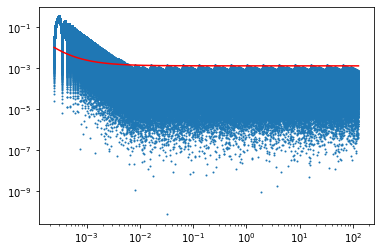

In [208]:
plt.plot(samples,2**((1/((samples*(64+32+16))+0.09)))/768,color="red",zorder=1)
plt.scatter(samples,ys,s=1,zorder=0)
plt.xscale('log')
plt.yscale('log')
plt.show()